In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks',
              rc={'axes.facecolor': (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams, colors, cm
rcParams['font.family'] = 'sans-serif'
rcParams['figure.dpi'] = 150

In [2]:
import numpy as np
import pandas as pd
# local import
from utils import read_mi, enrichment
from utils import ml_metrics, get_rbd_mutated

In [3]:
# gene lengths
glen = {'E': 228,
        'M': 669,
        'N': 1260,
        'ORF10': 117,
        'ORF1ab': 13218,
        'ORF3a': 828,
        'ORF6': 186,
        'ORF7a': 366,
        'ORF7b': 132,
        'ORF8': 366,
        'S': 3822}

In [4]:
mutated = get_rbd_mutated('../out/time-filtered-lineages/')

In [5]:
a = read_mi('../out/all-notime/mi_annotated.tsv.gz', date=False)

In [6]:
ml_metrics(a, mutated=mutated)

,metric,outlier,value,low,high
0,f1,1,0.538462,0.347826,0.711864
1,f1,2,0.538462,0.382979,0.689655
2,f1,3,0.636364,0.440636,0.784679
3,f1,4,0.555556,0.357143,0.750000
4,specificity,1,0.000000,NaN,NaN
5,specificity,2,0.000000,NaN,NaN
6,specificity,3,0.333333,0.171494,0.705042
7,specificity,4,0.500000,0.171494,0.705042
8,sensitivity,1,1.000000,NaN,NaN
9,sensitivity,2,1.000000,NaN,NaN


In [7]:
ag = a[(~a['gene_source'].isna()) & (~a['gene_target'].isna())].copy()
ag.groupby(['gene_source', 'interaction'])['pos_source'].count()

gene_source  interaction   
E            different gene      3
M            different gene     11
             same gene           6
N            different gene     21
             same gene           8
ORF10        different gene      1
             same gene           2
ORF1ab       different gene     56
             same gene         122
ORF3a        different gene     10
ORF6         different gene      4
ORF7a        different gene      4
             same gene           2
ORF7b        different gene      3
ORF8         different gene      7
             same gene          10
S            different gene     52
             same gene         130
Name: pos_source, dtype: int64

In [8]:
slen1 = pd.Series(glen).reset_index().rename(columns={'index': 'gene_source'})
slen1['interaction'] = 'same gene'
slen2 = pd.Series(glen).reset_index().rename(columns={'index': 'gene_source'})
slen2['interaction'] = 'different gene'
slen = pd.concat([slen1, slen2]).set_index(['gene_source', 'interaction'])[0]

In [9]:
icount = ag.groupby(['gene_source', 'interaction'])['pos_source'].count() / slen
icount.name = 'proportion'
icount = icount.reset_index().dropna()
icount

,gene_source,interaction,proportion
0,E,different gene,0.013158
2,M,different gene,0.016442
3,M,same gene,0.008969
4,N,different gene,0.016667
5,N,same gene,0.006349
6,ORF10,different gene,0.008547
7,ORF10,same gene,0.017094
8,ORF1ab,different gene,0.004237
9,ORF1ab,same gene,0.009230
10,ORF3a,different gene,0.012077


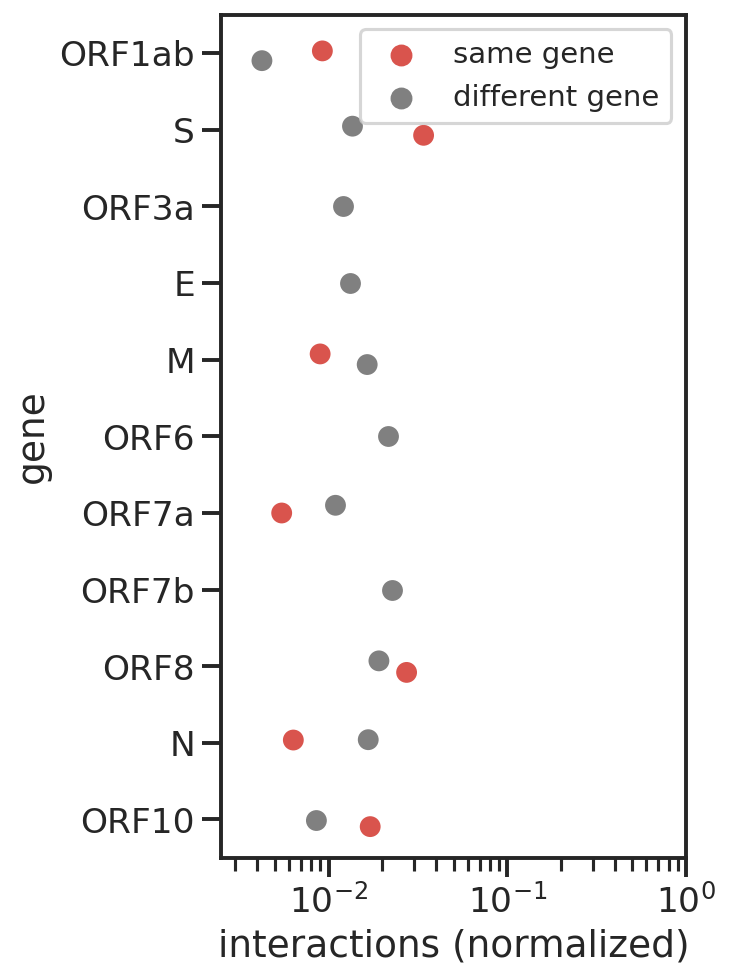

In [10]:
plt.figure(figsize=(4, 7.3))

sns.stripplot(data=icount,
            x='proportion',
            y='gene_source',
            hue='interaction',
            order=['ORF1ab', 'S', 'ORF3a', 'E',
                   'M', 'ORF6', 'ORF7a', 'ORF7b',
                   'ORF8', 'N', 'ORF10'],
            hue_order=['same gene',
                       'different gene'],
            palette=['xkcd:pale red',
                     'grey'],
            size=10)

plt.legend(facecolor='w', fontsize=14)

plt.xlim(2.5E-3, 1)
plt.xscale('log')

plt.ylabel('gene')
plt.xlabel('interactions (normalized)')

plt.savefig('same_diff_all.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('same_diff_all.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [11]:
c = {i+1: color
     for i, color in enumerate(sns.color_palette('crest_r', 4))}

In [12]:
norm = colors.Normalize(vmin=0, vmax=a['mi'].max(), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

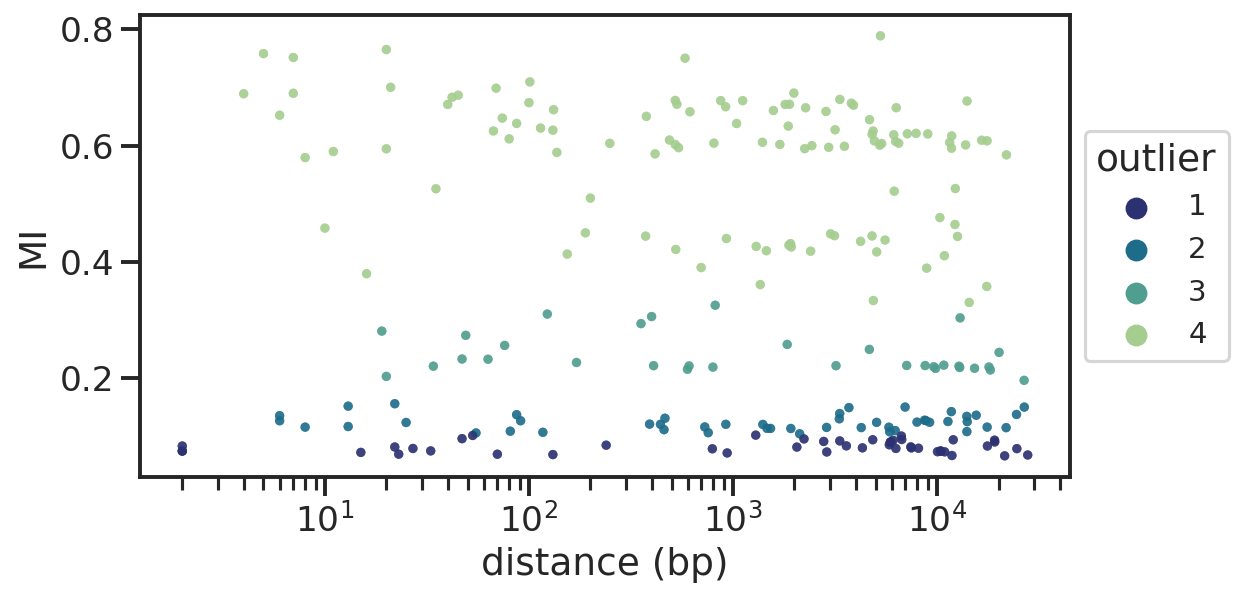

In [13]:
# distance Vs. MI
plt.figure(figsize=(8,4));
sns.scatterplot(data=a, x='distance', y='mi',hue="outlier", linewidth=0, alpha = 0.7, s=20, palette="crest_r");
plt.legend(facecolor='w', fontsize=14, loc='center left',
           bbox_to_anchor=(1, 0.5), title='outlier')
plt.xlabel('distance (bp)')
plt.ylabel('MI')
plt.xscale('log')
plt.savefig('distance_all.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('distance_all.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

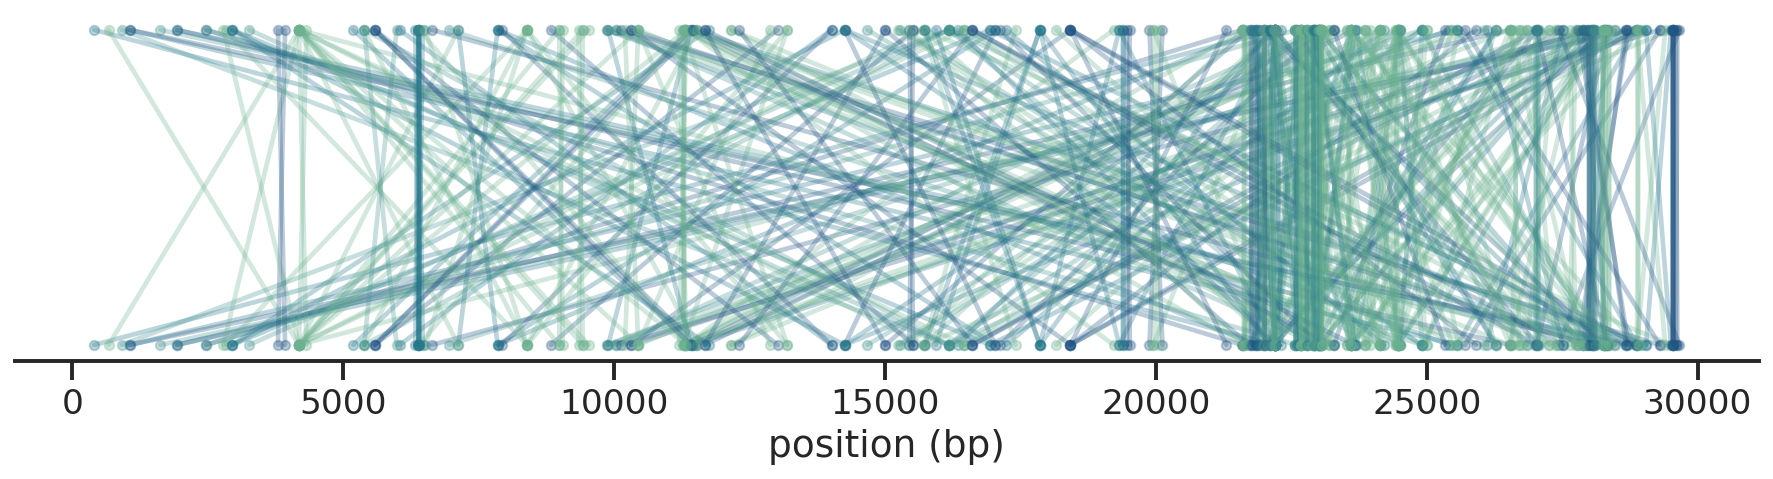

In [14]:
plt.figure(figsize=(15, 3))
for p1, p2, o in a[['pos_source', 'pos_target', 'outlier']].values:
    plt.plot([p1, p2],
             [0, 1], '.-',
             color=c[o], rasterized=True,
             alpha=0.3)
plt.yticks([])
plt.xlabel('position (bp)')
sns.despine(left=True)
# plt.fill_between([22520, 23186],
#                  [1.05, 1.05],
#                  [1.1, 1.1],
#                  color='r',
#                  alpha=0.3,
#                  zorder=10)
plt.savefig('interactions_all.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('interactions_all.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [15]:
df = enrichment(a, mutated, 'RBD.gml')

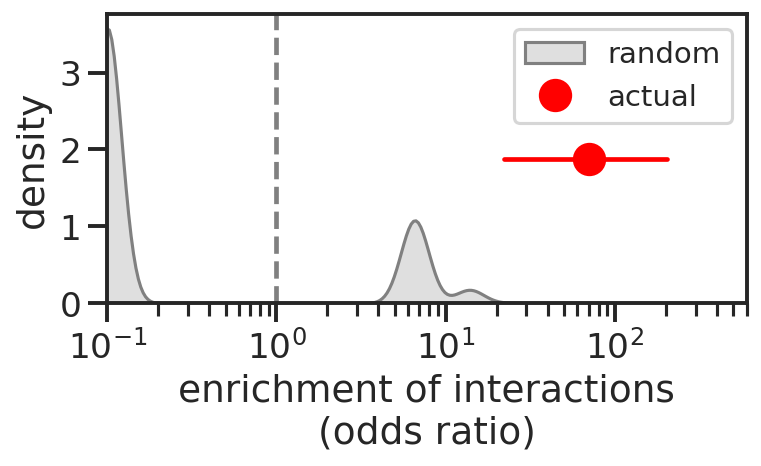

In [16]:
plt.figure(figsize=(5.5, 2.5))
sns.kdeplot(df[df['type'] != 'original']['odds-ratio'] + 0.1,
            bw_adjust=0.4,
            log_scale=True,
            color='grey', label='random',
            fill=True)
plt.plot(df[df['type'] == 'original']['odds-ratio'].values,
         plt.gca().get_ylim()[1] / 2,
         'ro', markersize=15,
         label='actual')
plt.plot([df[df['type'] == 'original']['low'].values[0],
          df[df['type'] == 'original']['high'].values[0]],
         [plt.gca().get_ylim()[1] / 2] * 2,
         'r-')
plt.axvline(1,
            color='grey', ls='dashed')
plt.ylabel('density')
plt.xlabel('enrichment of interactions\n(odds ratio)')
plt.legend(facecolor='w', fontsize=14)

plt.xlim(0.1, 600)

plt.savefig('enrichment_all.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('enrichment_all.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [17]:
df.groupby('type').median()

,odds-ratio,low,high
type,,,
original,69.853448,22.015399,202.05633
random,0.000000,NaN,NaN


In [18]:
df = enrichment(a[a['outlier'] > 2])

In [19]:
df.groupby('type').median()

,odds-ratio,low,high
type,,,
original,104.797414,42.912621,336.038945
random,0.000000,NaN,NaN
